In [1]:
# imports
import torch
from learning.utils.penv import ParallelEnv

import learning.utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# preparation
episodes = 100
steps = 25
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}\n")

# Set seed for all randomness sources
seed = 0

# init environments
envs = {
    "one-agent": {"agent_amount": 1},
    "two-agents": {"agent_amount": 2},
    "two-agents-mixed": {"agent_amount": 2, "mixed": True},
    "two-agents-percentage": {
        "agent_amount": 2, 
        "percentage":True
    },
    "three-agents": {"agent_amount": 3}
}

log_data = {}

Device: cpu



In [3]:
def load_environment(setting):
    env_id = "Empty-Grid-v0"
    # env = gym.make(id="Empty-Grid-v0", agents=setting["agent_amount"])
    if "mixed" in setting:
        env = learning.utils.make_env(
            env_id, setting["agent_amount"], seed=seed, mixed_motive=setting["mixed"])
    elif "percentage" in setting:
        env = learning.utils.make_env(
            env_id, setting["agent_amount"], seed=seed, percentage_reward=setting["percentage"])
    else:
        env = learning.utils.make_env(
            env_id, setting["agent_amount"], seed=seed)
    # env = ParallelEnv([env, env])
    return env

def load_agents(agent_amount, env, model): 
    model_dir = learning.utils.get_short_model_dir(model)
    agents = []
    for agent in range(agent_amount):
        agents.append(learning.utils.Agent(agent, env.observation_space, 
            env.action_space, model_dir, device=device))
    return agents

In [4]:
#load environments and their agents and gather data
for key, env_settings in envs.items():
    log_shape = (episodes, env_settings["agent_amount"])
    log_data[key] = {
        "reward": np.empty(shape=log_shape), 
        "reset_fields": [], 
        "grid_solved": []
    }

    env = load_environment(env_settings)
    agents = load_agents(env_settings["agent_amount"], env, key)

    # gather the plotting data

    for episode in range(episodes):
        reset_fields = 0
        obs = env.reset()
        for step in range(steps):
            joint_actions = []
            for agent_index, agent in enumerate(agents):
                action = agent.get_action(obs, agent_index)
                joint_actions.append(action)

            obs, reward, done, info = env.step(joint_actions)
            reset_fields += info["reset_fields"]

            if done or step == 24:          
                # save reward here since we work with sparse rewards
                log_data[key]["reward"][episode] = reward
                log_data[key]["reset_fields"].append(reset_fields)
                if 1 in reward:
                    log_data[key]["grid_solved"].append(1)
                else:
                    log_data[key]["grid_solved"].append(0)
                    
                break

---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----


C:\Users\Zarah\.virtualenvs\Coloring_with_CAP-xNNGJax5\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID FULLY COLORED! ----
---- GRID 

In [5]:
line_styles = ["-", "--", "-.", ":", ".", ",", "o", "v", "^", "<", ">"]
colors = ["b", "g", "r", "c", "m", "y"]

def plot_data(log_key, title):
    plt.figure(figsize=(20,10))
    counter = 0
    for key, env_settings in envs.items():
        color = colors[counter] if counter < len(colors) else colors[len(colors)%counter]   
        if log_key == "reward":
            # "mixed" distinguished between agents, so plot every agent
            if "mixed" in env_settings and env_settings["mixed"]:
                for agent in range(env_settings["agent_amount"]):
                    line_style = line_styles[agent] if agent < len(line_styles) else line_styles[len(line_styles)%agent]        
                    plt.plot(log_data[key][log_key][:,agent], color+line_style, label = key+str(agent))
            else:
                line = color + line_styles[0]
                plt.plot(log_data[key][log_key][:,0], line, label = key)
        else:
            plt.plot(log_data[key][log_key], color, label = key)
            
        counter += 1

    plt.ylabel(log_key)
    plt.xlabel('episode')
    plt.grid(True)
    plt.title(title)
    plt.legend()
    plt.show()

def plot_barchart(labels, values, ylabel, title):
    plt.figure(figsize=(20,10))
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show

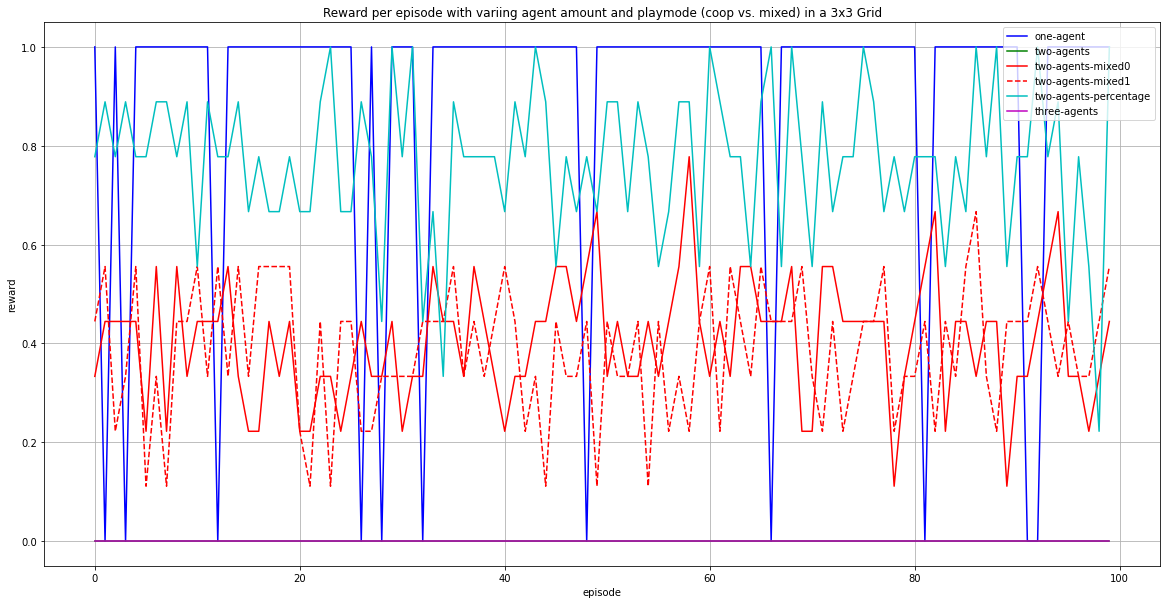

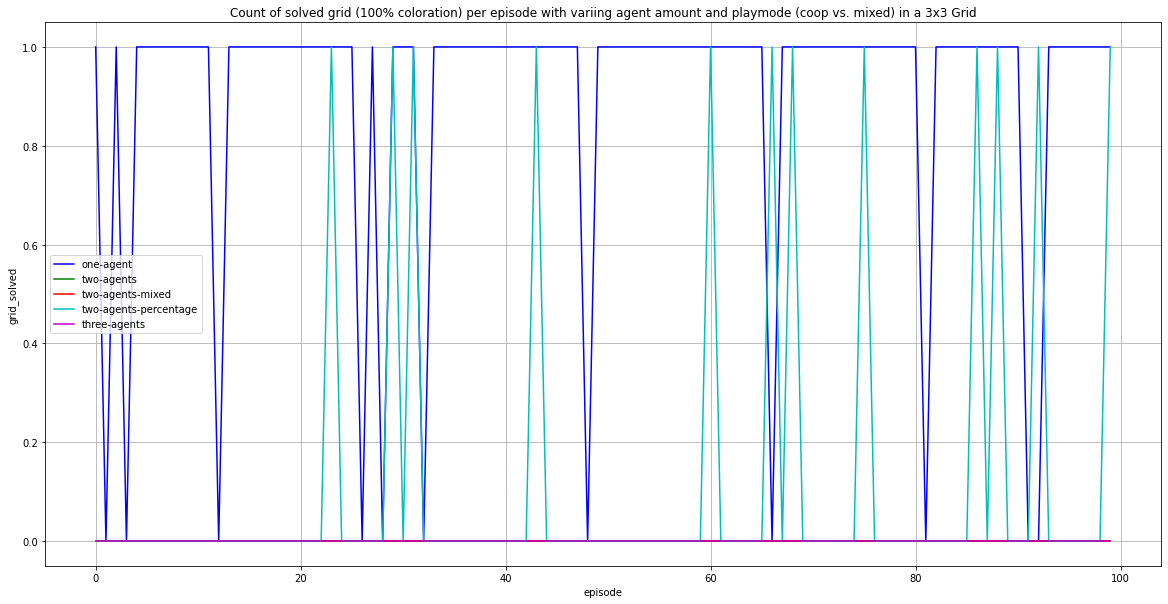

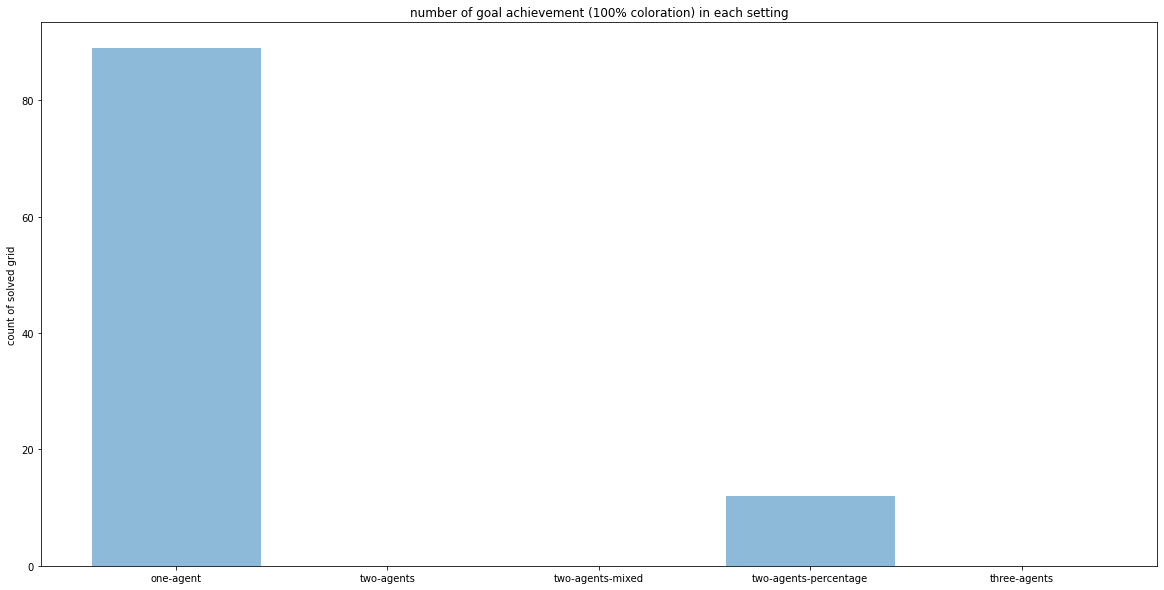

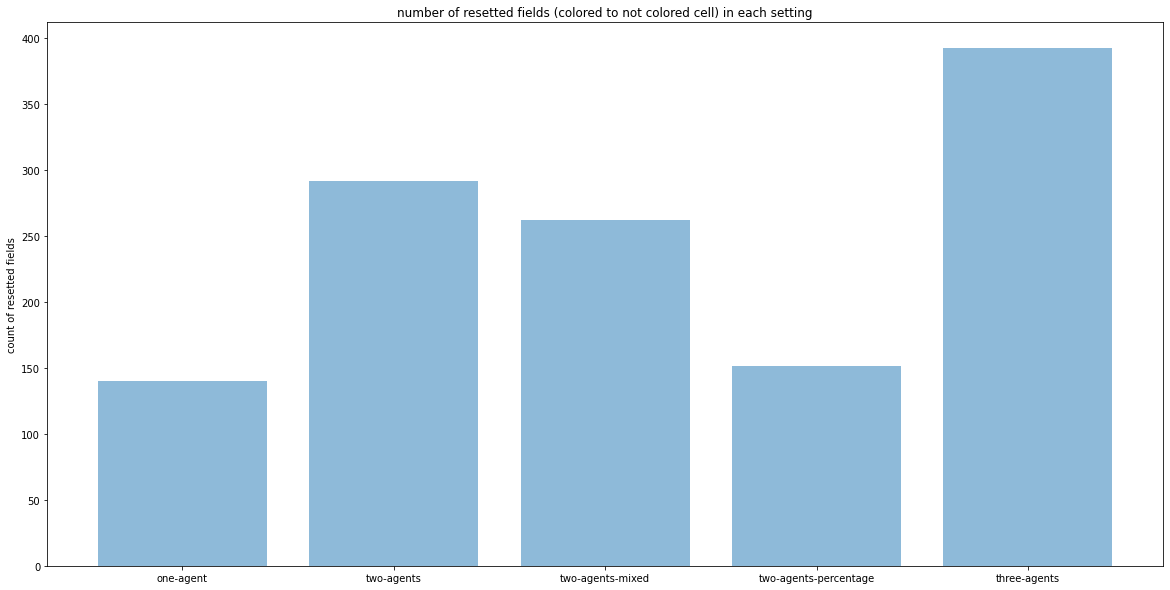

In [6]:
# plot the data

plot_data("reward", "Reward per episode with various agents and playmodes (coop vs. mixed) in a 3x3 Grid")
plot_data("grid_solved", "solved grid (100% coloration) with various agents and playmodes (coop vs. mixed) in a 3x3 Grid")
# plot_data("reset_fields", "Count of reset grid cells (colored to not colored) per episode with variing agent amount and playmode (coop vs. mixed) in a 3x3 Grid")

bar_labels = tuple(envs)
amount_solved_grid_per_setting = [sum(setting["grid_solved"]) for setting in log_data.values()]
amount_reset_fields_per_setting = [sum(setting["reset_fields"]) for setting in log_data.values()]

plot_barchart(bar_labels, amount_solved_grid_per_setting, "count of solved grid", 
    "number of goal achievement (100% coloration) in each setting")

plot_barchart(bar_labels, amount_reset_fields_per_setting, "count of reset fields", 
    "number of reset fields (colored to not colored cell) in each setting")
